In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TABLEAU_COLORS
import imageio

import nvix.camera as nvixc
import nvix.utils as nvixu

In [3]:
modelM = nvixc.model()
modelM

DeviceArray([[1., 0., 0., 0.],
             [0., 1., 0., 0.],
             [0., 0., 1., 0.],
             [0., 0., 0., 1.]], dtype=float32)

In [4]:
eye = (0, 0, 4)
at = (0, 0, 0)
up = (0, 1, 0)
viewM = nvixc.view(eye, at, up)
viewM

DeviceArray([[ 1.,  0.,  0.,  0.],
             [ 0.,  1.,  0.,  0.],
             [ 0.,  0.,  1., -4.],
             [ 0.,  0.,  0.,  1.]], dtype=float32)

In [5]:
xs, ys, zs = np.meshgrid([-1, 1], [-1, 1], [-1, 1])

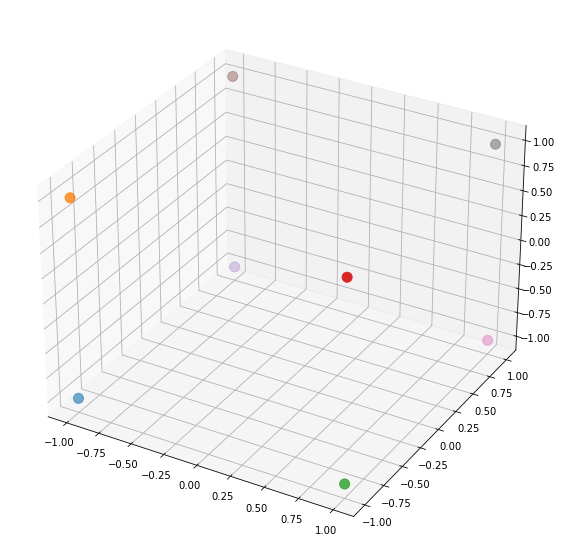

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(xs, ys, zs, color=list(TABLEAU_COLORS.keys())[:8], s=100)

In [7]:
fovy, aspect = 1, 1
# fovy, aspect = nvixc.whd2fov(2, 2, eye[-1]-1)
print(fovy, aspect)

1 1


In [8]:
near, far = 1, -1
projM = nvixc.projection(fovy, aspect, near, far)
projM

DeviceArray([[ 1.8304877,  0.       ,  0.       ,  0.       ],
             [ 0.       ,  1.8304877,  0.       ,  0.       ],
             [ 0.       ,  0.       ,  0.       , -1.       ],
             [ 0.       ,  0.       , -1.       ,  0.       ]],            dtype=float32)

In [9]:
xs = xs.ravel()
ys = ys.ravel()
zs = zs.ravel()
os = np.ones_like(zs)
points = np.vstack((xs, ys, zs, os))

In [10]:
pp = projM @ viewM @ modelM @ points

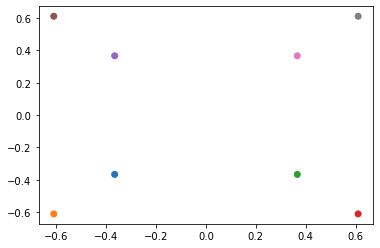

In [11]:
plt.scatter(pp[0]/pp[-1], pp[1]/pp[-1], color=list(TABLEAU_COLORS.keys())[:8])

In [12]:
at = np.array([0, 0, 0])
eye0 = np.array([0, 0, 4])
up0 = np.array([0, 1, 0])

In [15]:
for i, a in enumerate(np.linspace(0, 2*np.pi, 200)):
    rot = nvixu.rotate('y', a)
    eye = rot @ eye0
    up = rot @ up0
    viewM = nvixc.view(eye, at, up)
    pp = projM @ viewM @ modelM @ points
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.scatter(pp[0]/pp[-1], pp[1]/pp[-1], color=list(TABLEAU_COLORS.keys())[:8], s=100)
    fig.savefig(f'tmp/{i}.png')
    plt.close()

In [16]:
with imageio.get_writer('test.gif', mode='I') as writer:
    for i in range(200):
        image = imageio.imread(f'tmp/{i}.png')
        writer.append_data(image)

In [1]:
import numpy as np

In [2]:
a = np.zeros((4, 4))

In [3]:
a

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [4]:
import jax.numpy as jnp

In [5]:
jnp.array(a)

DeviceArray([[0., 0., 0., 0.],
             [0., 0., 0., 0.],
             [0., 0., 0., 0.],
             [0., 0., 0., 0.]], dtype=float32)